<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-23 00:04:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  67.7MB/s    in 2.2s    

2025-04-23 00:04:55 (67.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [7]:

print(df['SOPartFreq'].value_counts(dropna=False))
print(df['JobSat'].value_counts(dropna=False))

SOPartFreq
Less than once per month or monthly                   24162
NaN                                                   20200
I have never participated in Q&A on Stack Overflow    11143
A few times per month or weekly                        6277
A few times per week                                   2278
Daily or almost daily                                   936
Multiple times per day                                  441
Name: count, dtype: int64
JobSat
NaN     36311
8.0      7509
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64


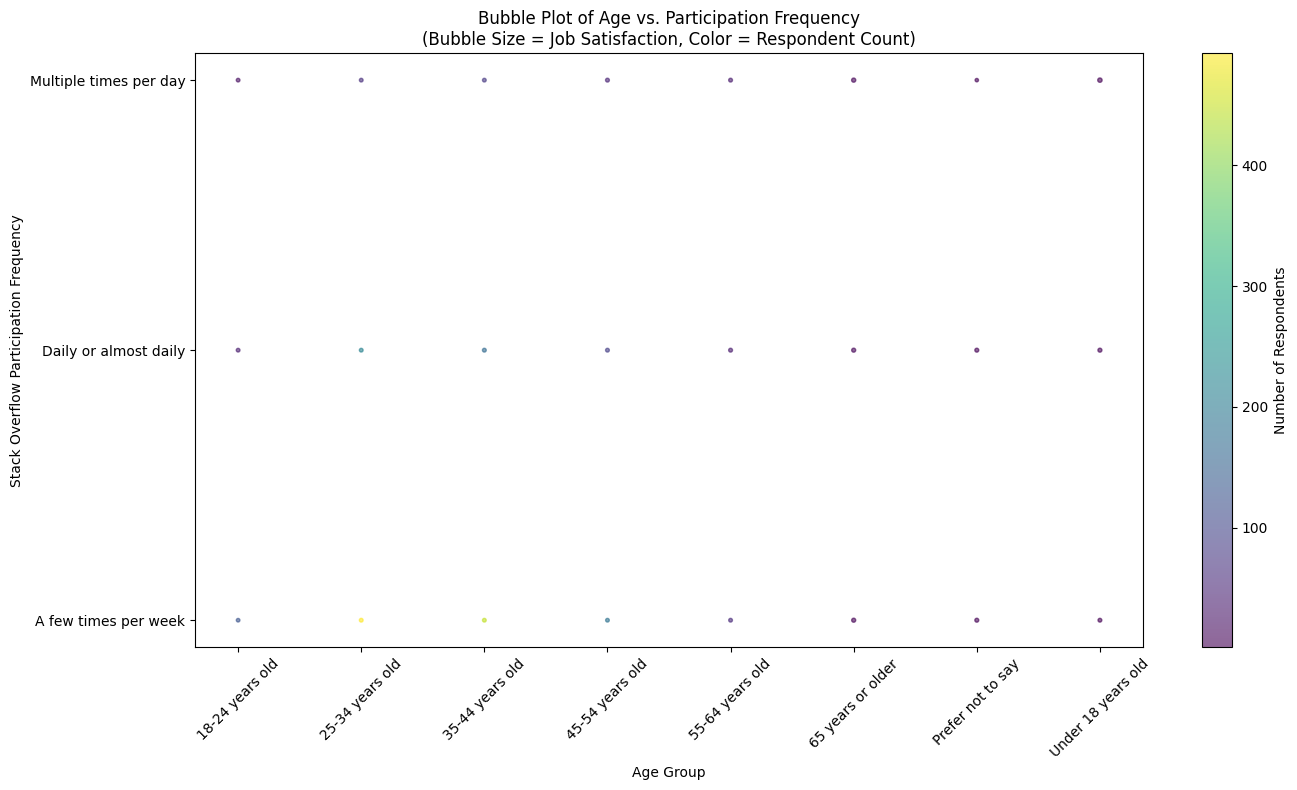

In [6]:
##Write your code here
freq_order = [
    'Multiple times per day',
    'Daily or almost daily',
    'A few times per week',
    'A few times per month or weekly'
    'Less than once per month or monthly'
    'I have never participated in Q&A on Stack Overflow'
]

# Drop NA and clean
df_clean = df[['Age', 'SOPartFreq', 'JobSat']].dropna()
df_clean = df_clean[df_clean['SOPartFreq'].isin(freq_order)]

# Convert JobSat to numeric if not already
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')
df_clean = df_clean.dropna(subset=['JobSat'])

# Group and compute average job satisfaction + count
df_grouped = df_clean.groupby(['Age', 'SOPartFreq']).agg(
    AvgJobSat=('JobSat', 'mean'),
    Count=('JobSat', 'size')
).reset_index()

# Plot bubble chart
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=df_grouped['Age'],
    y=df_grouped['SOPartFreq'],
    s=df_grouped['AvgJobSat'],  # bubble size = average job satisfaction
    alpha=0.6,
    c=df_grouped['Count'],      # color = how many respondents
    cmap='viridis'
)

plt.title('Bubble Plot of Age vs. Participation Frequency\n(Bubble Size = Job Satisfaction, Color = Respondent Count)')
plt.xlabel('Age Group')
plt.ylabel('Stack Overflow Participation Frequency')
plt.xticks(rotation=45)
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Respondents')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


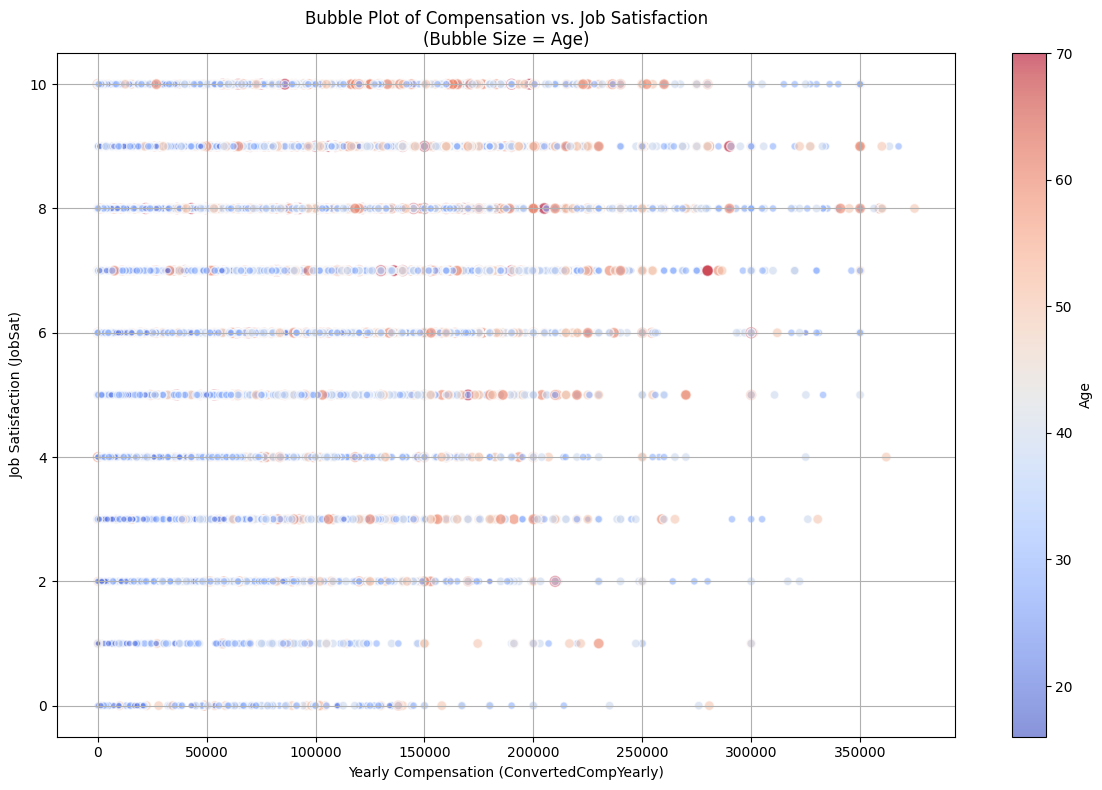

In [8]:
##Write your code here
# Filter and clean the data
df_bubble = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()

# Map Age to numeric midpoint values for bubble size
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_bubble['AgeNum'] = df_bubble['Age'].map(age_map)
df_bubble = df_bubble.dropna(subset=['AgeNum'])

# Convert JobSat to numeric if it’s not already (assuming it's on a 0–100 scale)
df_bubble['JobSat'] = pd.to_numeric(df_bubble['JobSat'], errors='coerce')
df_bubble = df_bubble.dropna(subset=['JobSat', 'ConvertedCompYearly'])

# filter extreme compensation outliers
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < df_bubble['ConvertedCompYearly'].quantile(0.99)]

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSat'],
    s=df_bubble['AgeNum'],       # Bubble size based on age
    alpha=0.6,
    c=df_bubble['AgeNum'],       # Color by age too
    cmap='coolwarm',
    edgecolors='w'
)

plt.title('Bubble Plot of Compensation vs. Job Satisfaction\n(Bubble Size = Age)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSat)')
cbar = plt.colorbar(scatter)
cbar.set_label('Age')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



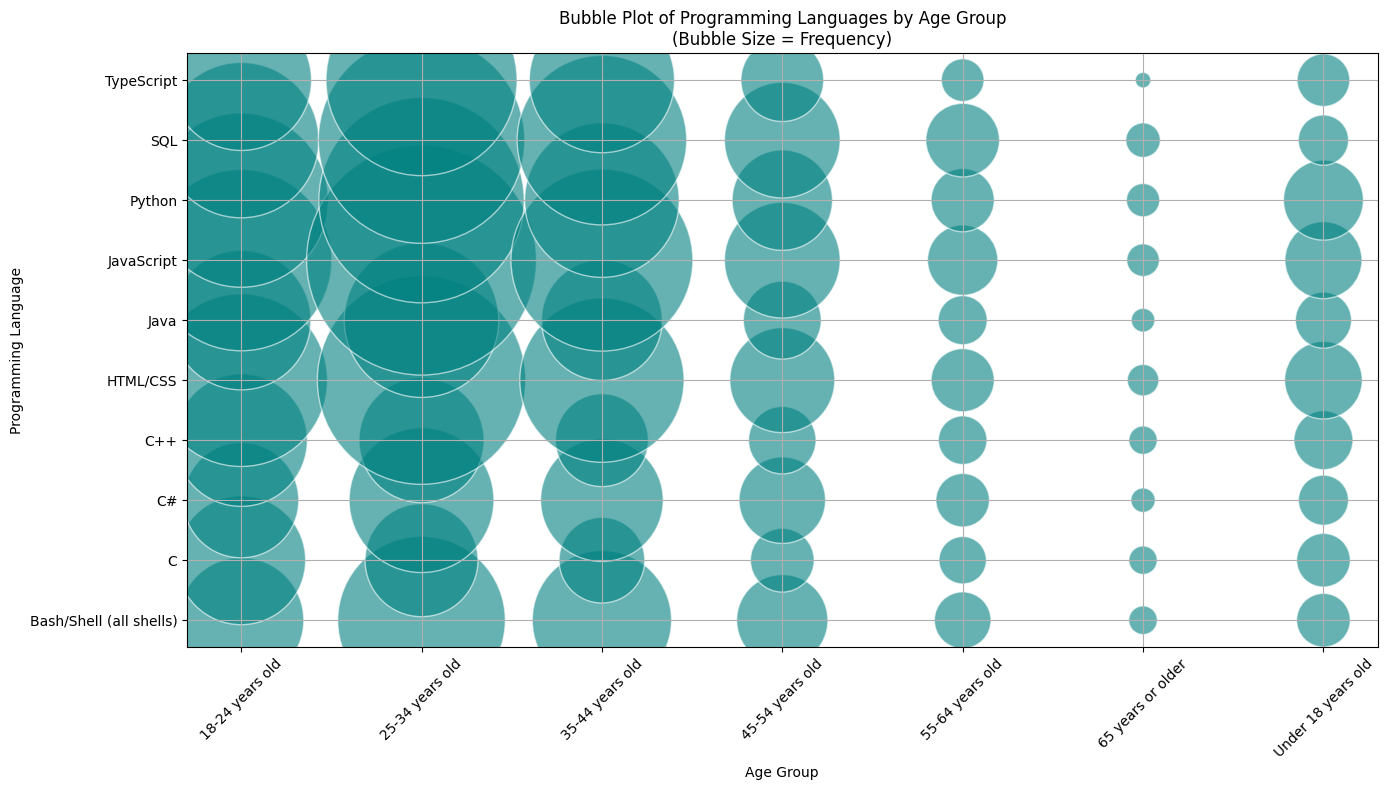

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Filter and clean the data
df_lang = df[['Age', 'LanguageHaveWorkedWith']].dropna()

# Map Age groups to consistent order (optional)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_lang = df_lang[df_lang['Age'].isin(age_order)]

# Explode the LanguageHaveWorkedWith column into individual rows
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang_exploded = df_lang.explode('LanguageHaveWorkedWith')

# Count frequency of each language per age group
lang_counts = (
    df_lang_exploded.groupby(['Age', 'LanguageHaveWorkedWith'])
    .size()
    .reset_index(name='Frequency')
)

# Optional: limit to top 10 languages overall for clearer visualization
top_langs = (
    lang_counts.groupby('LanguageHaveWorkedWith')['Frequency']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
lang_counts = lang_counts[lang_counts['LanguageHaveWorkedWith'].isin(top_langs)]

# Bubble plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=lang_counts['Age'],
    y=lang_counts['LanguageHaveWorkedWith'],
    s=lang_counts['Frequency'] * 2,  # adjust size scale
    alpha=0.6,
    color='teal',
    edgecolors='w'
)

plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.title('Bubble Plot of Programming Languages by Age Group\n(Bubble Size = Frequency)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


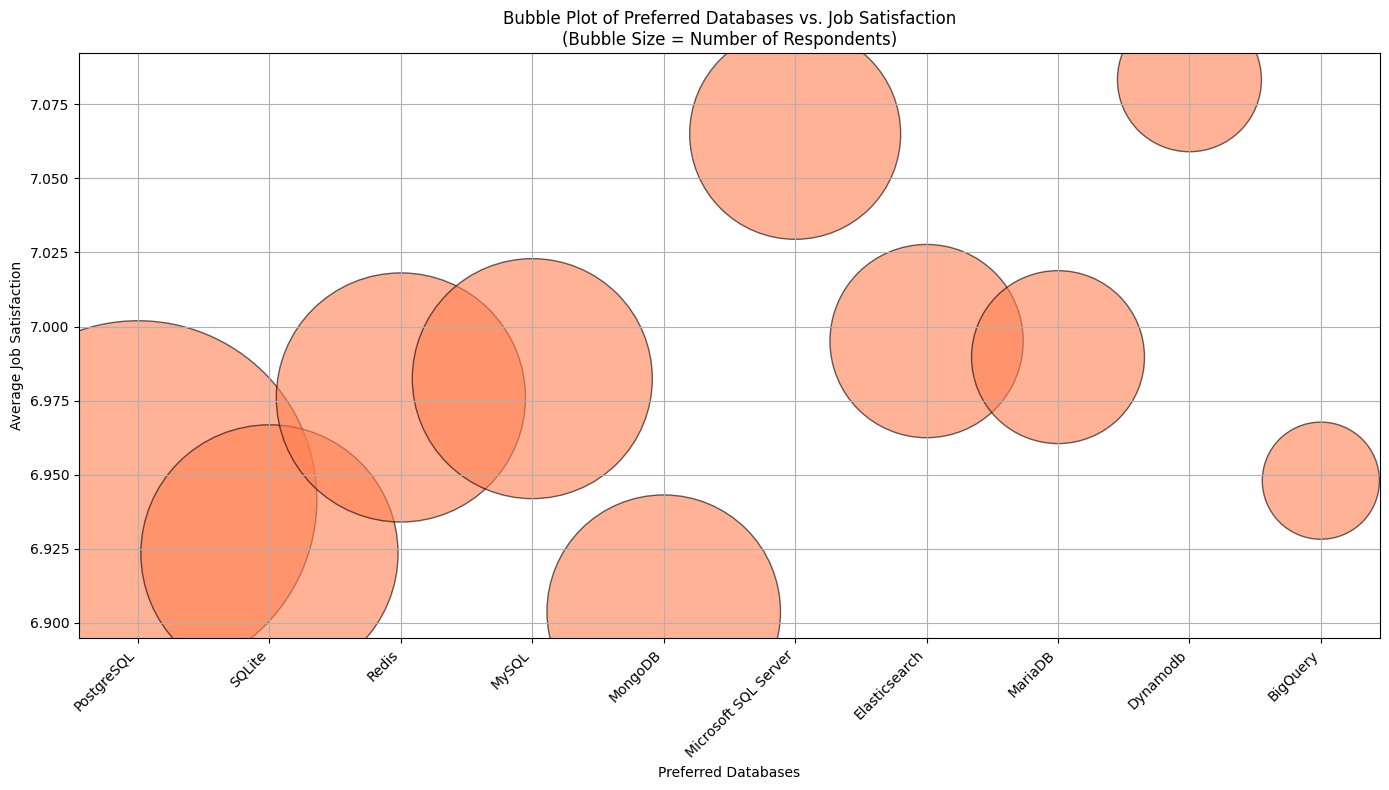

In [10]:
##Write your code here
# Filter relevant columns and drop missing values
df_db = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()

# Split and explode database responses
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_db_exploded = df_db.explode('DatabaseWantToWorkWith')

# Group by database and calculate mean job satisfaction & count
db_summary = (
    df_db_exploded.groupby('DatabaseWantToWorkWith')
    .agg(AverageJobSat=('JobSat', 'mean'), RespondentCount=('JobSat', 'count'))
    .reset_index()
)

# Optional: Keep top 10 most desired databases
top_dbs = db_summary.sort_values(by='RespondentCount', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(
    x=top_dbs['DatabaseWantToWorkWith'],
    y=top_dbs['AverageJobSat'],
    s=top_dbs['RespondentCount'] * 5,  # Adjust bubble size
    alpha=0.6,
    color='coral',
    edgecolors='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Preferred Databases')
plt.ylabel('Average Job Satisfaction')
plt.title('Bubble Plot of Preferred Databases vs. Job Satisfaction\n(Bubble Size = Number of Respondents)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


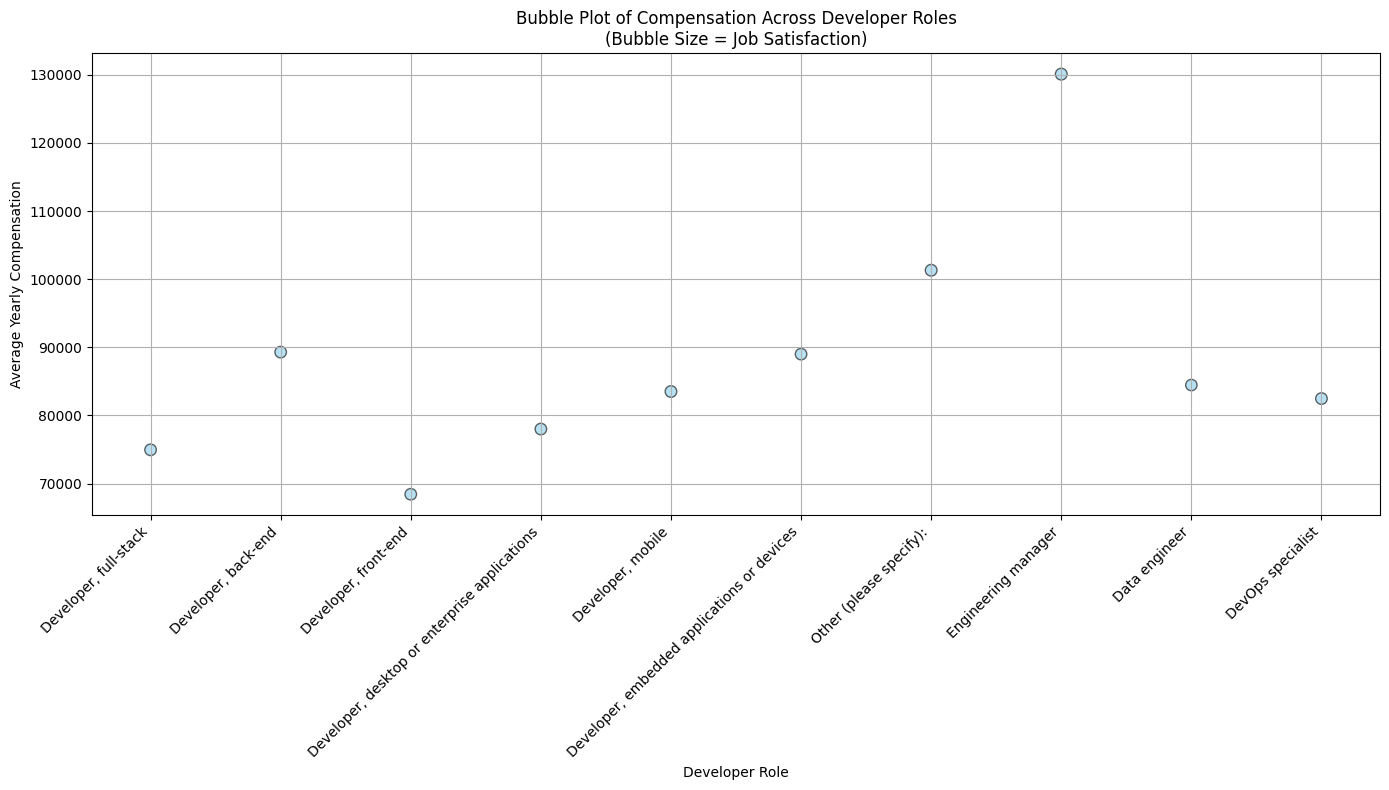

In [11]:
##Write your code here
# Filter and clean the relevant data
df_roles = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

# Split multiple DevTypes and explode into separate rows
df_roles['DevType'] = df_roles['DevType'].str.split(';')
df_exploded = df_roles.explode('DevType')

# Group by DevType and calculate average compensation and job satisfaction
role_summary = (
    df_exploded.groupby('DevType')
    .agg(AverageComp=('ConvertedCompYearly', 'mean'),
         AverageJobSat=('JobSat', 'mean'),
         RespondentCount=('JobSat', 'count'))
    .reset_index()
)

# Optional: filter to top 10 most common DevTypes
top_roles = role_summary.sort_values(by='RespondentCount', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(
    x=top_roles['DevType'],
    y=top_roles['AverageComp'],
    s=top_roles['AverageJobSat'] * 10,  # Scale job satisfaction for bubble size
    alpha=0.6,
    color='skyblue',
    edgecolors='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Developer Role')
plt.ylabel('Average Yearly Compensation')
plt.title('Bubble Plot of Compensation Across Developer Roles\n(Bubble Size = Job Satisfaction)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


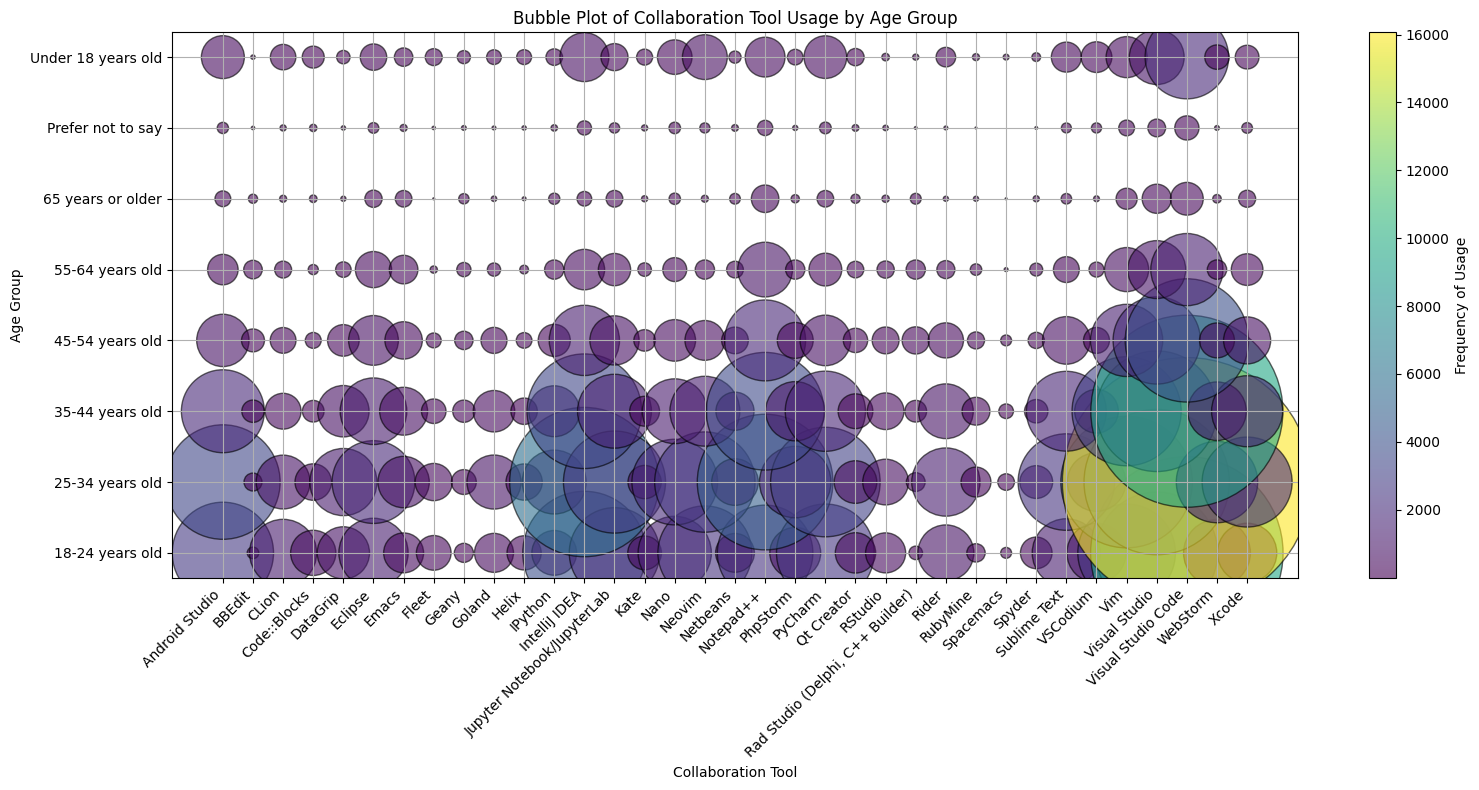

In [12]:
##Write your code here
# Step 1: Filter and prepare relevant columns
df_tools = df[['NEWCollabToolsHaveWorkedWith', 'Age']].dropna()

# Step 2: Split semicolon-separated tools and explode the rows
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df_tools.explode('NEWCollabToolsHaveWorkedWith')

# Step 3: Group by Age and Collaboration Tool
grouped = (
    df_exploded.groupby(['Age', 'NEWCollabToolsHaveWorkedWith'])
    .size()
    .reset_index(name='ToolUsageCount')
)

# Step 4: Plot the bubble chart
plt.figure(figsize=(16, 8))
scatter = plt.scatter(
    x=grouped['NEWCollabToolsHaveWorkedWith'],
    y=grouped['Age'],
    s=grouped['ToolUsageCount'] * 2,  # scale bubble size
    alpha=0.6,
    c=grouped['ToolUsageCount'],
    cmap='viridis',
    edgecolors='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Collaboration Tool')
plt.ylabel('Age Group')
plt.title('Bubble Plot of Collaboration Tool Usage by Age Group')
plt.colorbar(scatter, label='Frequency of Usage')
plt.tight_layout()
plt.grid(True)
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
##Write your code here

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
